In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [5]:
sql = "select * from student"

3.1

In [6]:
df = pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


3.2

In [7]:
sql = "select professor.p_name, course.c_name from professor inner join course on professor.p_email = course.p_email"

In [8]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter
4,p4,linkedin


3.3

In [9]:
sql = "select c_number, count(s_email) as enroll_count from enroll group by c_number"

<AxesSubplot:xlabel='c_number'>

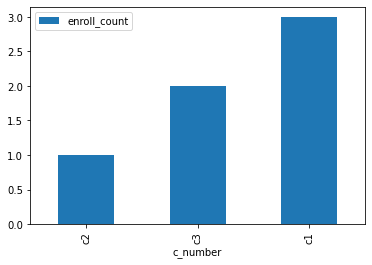

In [10]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number')

3.4

In [11]:
sql = "select professor.p_name, count(course.c_name) as teach_num from professor inner join course on professor.p_email = course.p_email group by professor.p_name"

<AxesSubplot:xlabel='p_name'>

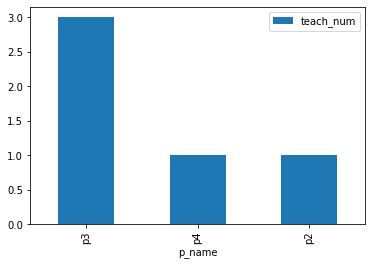

In [12]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name')

3.5

In [16]:
sql = """
    insert into professor (p_email,p_name,office)
    values('{}', '{}', '{}')
    """.format('p4@jmu.edu','p4','o4')
print(sql)


    insert into professor (p_email,p_name,office)
    values('p4@jmu.edu', 'p4', 'o4')
    


In [17]:
cur=conn.cursor()

In [18]:
cur.execute(sql)

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [41]:
conn.rollback()

In [38]:
sql = """
    insert into professor (p_email,p_name,office)
    values('{}', '{}', '{}')
    """.format('p4@jmu.edu','p4','o4')
print(sql)


    insert into professor (p_email,p_name,office)
    values('p4@jmu.edu', 'p4', 'o4')
    


In [39]:
cur=conn.cursor()

In [40]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [23]:
conn.commit()

In [24]:
sql = "select * from professor"

In [25]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [26]:
sql = """
    insert into course (c_number,c_name,room,p_email)
    values('{}', '{}', '{}', '{}')
    """.format('c5','linkedin','r2', 'p4@jmu.edu')
print(sql)


    insert into course (c_number,c_name,room,p_email)
    values('c5', 'linkedin', 'r2', 'p4@jmu.edu')
    


In [27]:
cur=conn.cursor()

In [28]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [29]:
conn.commit()

In [30]:
sql = "select * from course"

In [31]:
df = pandas.read_sql_query(sql,conn)

df[:]

,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


3.6

In [42]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
    """.format('p4@jmu.edu','p2@jmu.edu')

In [43]:
cur.execute(sql)

In [44]:
conn.commit()

In [45]:
sql = "select * from course"

In [47]:
df = pandas.read_sql_query(sql,conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [50]:
sql = """
    delete from professor
    where p_email = '{}'
    """.format('p2@jmu.edu')

In [51]:
cur.execute(sql)

In [52]:
conn.commit()

In [53]:
sql = "select * from professor"

In [54]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [55]:
cur.close()

In [57]:
conn.close()